<div class="output_png output_subarea output_execute_result">
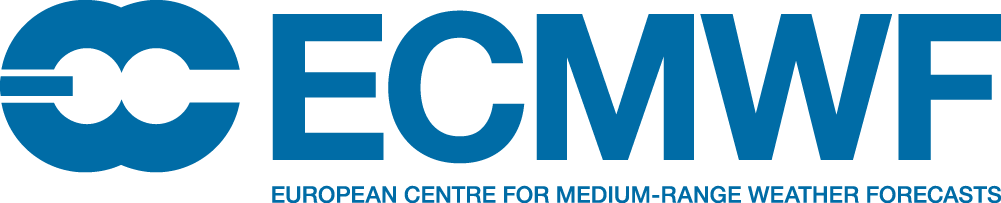
</div>

# 	Ensemble mean for total precipitation

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://charts.ecmwf.int/products/medium-tp-mean  


<div class="output_png output_subarea output_execute_result">
<center>
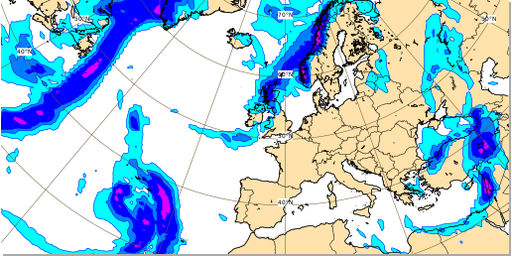</center>
</div>

The full list of available Open data products can be found [here](https://www.ecmwf.int/en/forecasts/datasets/open-data), and more information can be found in the [User documentation](https://confluence.ecmwf.int/display/DAC/ECMWF+open+data%3A+real-time+forecasts+from+IFS+and+AIFS).  

Access to ECMWF Open data is governed by the Creative Commons CC-BY-4.0 licence and associated [Terms of Use](https://apps.ecmwf.int/datasets/licences/general/).  

<sub> In applying this licence, ECMWF does not waive the privileges and immunities granted to it by virtue of its status as an intergovernmental organisation nor does it submit to any jurisdiction </sub>

To find out how to obtain the access to the full forecast dataset at higher resolution please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input 1 parameter :

* [Total precipitation](https://codes.ecmwf.int/grib/param-db/228228)  


In this example, we will use: 
- [**ecmwf.opendata**](https://github.com/ecmwf/ecmwf-opendata) Client to download the data
- [**Metview**](https://metview.readthedocs.io/en/latest/) library to read, process and plot the data 

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [1]:
#!pip install ecmwf-opendata metview metview-python

In [2]:
import metview as mv
from ecmwf.opendata import Client

In [3]:
client = Client("ecmwf", beta=True)

In [4]:
parameters = ['tp']
filename = 'medium-tp-mean.grib'
filename

'medium-tp-mean.grib'

To calculate the mean of total precipitation, we need to retrieve all the ensemble members at the given time.  
Setting the **type** to **ef** will download all 50 ensemble members as well as the control forecast.

Setting date to 0 will download today's data. 
Removing date and time altogether from the request will download the latest data.  
Try commenting out date and time to download latest forecast!

In [5]:
client.retrieve(
    date=0,
    time=0,
    step=[9,12],
    stream="enfo",
    type=['cf', 'pf'],
    levtype="sfc",
    param=parameters,
    target=filename
)

<multiple>:   0%|          | 0.00/73.7M [00:00<?, ?B/s]

## Reading and processing the data
Now we can use **Metview's read() function** to read the file.

In [6]:
data = mv.read(filename)

The **describe()** function will give us the overview of the dataset.  

In [7]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
tp,surface,0,20241224,0,"9,12","0,1,...",228,od,enfo,"cf,pf",0001


And an overview of one parameter, where we can see more information, such as units or type of level.

In [8]:
data.describe('tp')

shortName,tp
name,Total precipitation
paramId,228
units,m
typeOfLevel,surface
level,0
date,20241224
time,0
step,"9,12"
number,"0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,3,30,31,32,33,34,35,36,37,38,39,4,40,41,42,43,44,45,46,47,48,49,5,50,6,7,8,9"
class,od


We can use **ls()** function to list all the fields in the file we downloaded.

In [9]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,tp,surface,0,20241224,0,0-9,pf,32,regular_ll
1,ecmf,tp,surface,0,20241224,0,0-9,pf,50,regular_ll
2,ecmf,tp,surface,0,20241224,0,0-9,pf,23,regular_ll
3,ecmf,tp,surface,0,20241224,0,0-9,pf,14,regular_ll
4,ecmf,tp,surface,0,20241224,0,0-9,pf,41,regular_ll
5,ecmf,tp,surface,0,20241224,0,0-9,pf,33,regular_ll
6,ecmf,tp,surface,0,20241224,0,0-9,pf,42,regular_ll
7,ecmf,tp,surface,0,20241224,0,0-9,pf,24,regular_ll
8,ecmf,tp,surface,0,20241224,0,0-9,pf,6,regular_ll


### Calculating total precipitation between two forecast steps
Toral precipitation data is provided as accumulated value from the start of the forecast. Therefore we need to 'deacumulate' it, to calculate the precipitation between two steps.  
In other words, we need to substract the value at step 9 from value at step 12, to get the value of precipitation between steps 9 and 12.  
Metview has built in fuction **deac()** which will do this for us.  
However in order for it to do it, we need first to sort the fieldset.

The following cell will select needed steps, sort the ensemble members and do the substraction for all the ensemble members.

In [10]:
tp_09 = data.select(step= 9).sort()
tp_12 = data.select(step= 12).sort()
tp = tp_12 - tp_09

In the end we still need to calculate the mean total precipitation.  
In the same line of code we will compute the data in milimeters by multiplying by 1000.

In [11]:
tp_mean = mv.mean(tp) * 1000

## Plotting the data
And finally, we can plot the data on the map. 

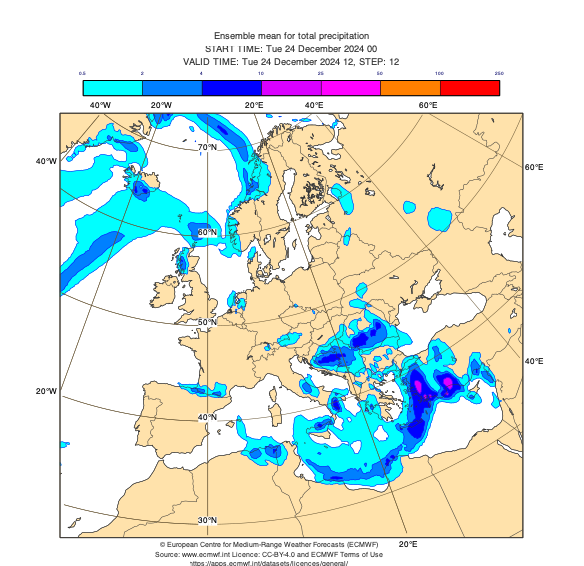

In [12]:
# define coastlines
coast = mv.mcoast(
    map_coastline_colour="charcoal",
    map_coastline_resolution="medium",
    map_coastline_land_shade="on",
    map_coastline_land_shade_colour="cream",
    map_coastline_sea_shade="off",
    map_boundaries="on",
    map_boundaries_colour= "charcoal",
    map_boundaries_thickness = 1,
    map_disputed_boundaries = "off",
    map_grid_colour="tan",
    map_label_height=0.35,
)

# define view
view = mv.geoview(
    area_mode="name",
    area_name="europe",
    coastlines=coast
)

#define styles
tp_mean_shade = mv.mcont(legend= "on",
                contour_automatics_settings = "style_name",
                contour_style_name = "sh_blured_f05t300lst")

title = mv.mtext(
    text_lines=["Ensemble mean for total precipitation", 
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H'/>, STEP: <grib_info key='step' />"],
    text_font_size=0.4,
    text_colour         = 'charcoal')

ecmwf_text = mv.mtext(    
    text_lines          = ["© European Centre for Medium-Range Weather Forecasts (ECMWF)",
                           "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use",
                            "https://apps.ecmwf.int/datasets/licences/general/"],
    text_justification  = 'center',
    text_font_size      = 0.3,
    text_mode           = "positional",
    text_box_x_position = 6.,
    text_box_y_position = -0.2,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_colour         = 'charcoal')

# generate plot
mv.setoutput('jupyter', plot_widget=False)
mv.plot(view, tp_mean, tp_mean_shade, title, ecmwf_text)

To generate the png file you can run the following cell.

In [13]:
png = mv.png_output(
      output_name = "medium-tp-mean",   # specify relative or full path
      output_title = "medium-tp-mean",    # title used by a viewer
      output_width = 1000,                 # set width in pixels
)
mv.setoutput(png)
mv.plot(view, tp_mean, tp_mean_shade, title, ecmwf_text)

Note that plot produced using open data dataset will slightly differ from one from Open Charts. This is due to different resolution of the data.  
Open data is on 0.25x0.25 resolution, while high resolution data is 0.1x0.1 grid.